# Coursework #2 AI for Sustainable Development

## Introduction & Previous work

### Introduction to the Dataset

Conflict is an ever-present part of the world we live in, and the last couple of years have shown that it is not slowing down. That is why The Armed Conflict Location & Event Data Project (ACLED) 's work remains important. They collect “real-time data on the locations, dates, actors, fatalities, and types of all reported political violence and protest events around the world”, and have publicly available datasets with millions of points starting from 1997 and updated weekly [1]. This data is collected from local, national, and international sources and manually coded by experts using a set of guidelines [1]. 

As part of ACLED’s more specific gendered coverage, there are tags whenever women are the primary targets or victims in a political violence event. ‘Political violence targeting women’ (PVTW) events are denoted with ‘Women (COUNTRY)’ as an associated actor to civilians [2]. Of these, ‘political violence targeting women in politics’ (PVTWIP) refer to those events in which one of the 'women targeted' tags is in the 'tags' column. As this specifically focuses on political violence targeting women, domestic, interpersonal, or intimate partner violence, as well as criminal violence, are not captured here. The tag for PVTWIP is ‘women targeted’, and there are subsections to this, outlined below [2].

| Tag | Description |
| --- | --- |
| women targeted: candidates for office | Women who are running for a publicly elected government position |
| women targeted: politicians | Women who currently serve in an elected position in government |
| women targeted: political party supporters | Women who contribute to, or specifically refuse to contribute to, endorse, and/or act in support of a political party or candidate that extends outside of voting, via membership, participation in party events, monetary donations, or other forms of support. |
| women targeted: voters | Women who are actively participating in, have actively participated in, or attempt to actively participate in local, state/regional, and/or national elections or referendums.  |
| women targeted: government officials | Women who work for the local, regional, or national government in a non-partisan capacity.  |
| women targeted: activists/human rights defenders/social leaders | Women who peacefully advocate for a specific social cause and/or actively promote the expansion or protection of human rights.  |
| women targeted: protesters | This tag is applied to peaceful 'Demonstration Featuring Women' events that are targeted with excessive force.  |
| women targeted: relatives of targeted groups or persons | Women who are subject to violence as a result of who they are married to, the daughter of, related to, or are otherwise personally connected to (e.g. candidates, politicians, social leaders, armed actors, voters, party supporters, etc.). |
| women targeted: accused of witchcraft/sorcery | Women accused of witchcraft, sorcery, or other mystical or spiritual practices that are typically considered taboo or dangerous within some societies. |
| women targeted: girls | Girls under the age of 18; they may be specifically referred to by age or explicitly referred to as a child/girl. |

### Link to Sustainable Development & Goal

Violence against women is specifically addressed in the UN Sustainable Development Goals (UN SDGs). Target 5.2, a sub-target of the broader goal of gender equality, outlines the goal to “eliminate violence against women and girls: Eliminate all forms of violence against all women and girls in the public and private spheres, including trafficking and sexual and other types of exploitation” [5]. This work will specifically focus on the public sphere, where, when conflicts arise within a political realm, how often women become targets of this conflict through a range of events including sexual violence. This work is important as it can highlight regions of the world, categories of conflicts, and periods where women are disproportionately affected, as well as help predict if a conflict is arising, and whether women are likely to be targets of it. Additionally, SDG 16, outlines how to “promote peaceful and inclusive societies for sustainable development, provide access to justice for all, and build effective, accountable, and inclusive institutions” [6], understanding political violence in general and women targeted specifically can perhaps help prevent these conflicts from arising in the future.

### Previous Work & Novelty of this Work

Several papers have used the ACLED dataset to derive machine learning models that perform classification tasks, such as “ECO: Using AI for Everyday Armed Conflict Analysis” [3], which uses a deep NLP model to transform conflict data by performing event classification. Another example is “A Model for Conflicts’ Prediction using Deep Neural Network” [4], where neural networks were again used for predicting the event type in a multi-classification problem. Although several machine learning models have used this dataset to solve classification problems, there have been none (as far as I could find) that specifically focused on ACLED’s “women targeted” tag, which approaches this work novel. Although it will be outlined more precisely later, the task this work will focus on is creating a binary classification model that can predict, based on features in the ACLED dataset, whether women were or were not targets in conflicts.

## Exploratory data analysis

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
data_path = "2022-01-01-2023-01-01.csv"
original_dataset = pd.read_csv(data_path)

ACLED, as mentioned before, started collecting data in 1997, but did not have all countries they have now at that time. In order to keep the amount of data reasonable, and to make it as relevant as possible, we only downloaded data from one year - that is, January 1st 2022 till January 1st 2023. This dataset, as seen below, has 31 columns, and 304,435 rows.

In [4]:
print('There are {} columns, {} rows, and these are there names: {}'.format(len(original_dataset.columns), len(original_dataset), list(original_dataset.columns)))

There are 31 columns, 304435 rows, and these are there names: ['event_id_cnty', 'event_date', 'year', 'time_precision', 'disorder_type', 'event_type', 'sub_event_type', 'actor1', 'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2', 'interaction', 'civilian_targeting', 'iso', 'region', 'country', 'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude', 'geo_precision', 'source', 'source_scale', 'notes', 'fatalities', 'tags', 'timestamp']


The columns are described by ACLED themselves in their codebook [7], with their short descriptions seen in the table below.

| Column Name | Description |
| --- | --- |
| ISO | A numeric code for each individual country |
| EVENT_ID_CNTY | An individual identifier by number and country acronym (updated annually) |
| DISORDER_TYPE | The type of disorder a particular event falls into; either ‘political violence,’ ‘demonstrations,’ or ‘strategic developments’ |
| EVENT_DATE | The day, month and year on which an event took place |
| YEAR | The year in which an event took place |
| TIME_PRECISION | A numeric code indicating the level of certainty of the date coded for the event |
| EVENT_TYPE | The type of event |
| SUB_EVENT_TYPE | The type of sub-event |
| ACTOR1 | The named actor involved in the event |
| ASSOC_ACTOR_1 | The named actor associated with or identifying ACTOR1 |
| INTER1 | A numeric code indicating the type of ACTOR1 |
| ACTOR2 | The named actor involved in the event |
| ASSOC_ACTOR_2 | The named actor associated with or identifying ACTOR2 |
| INTER2 | A numeric code indicating the type of ACTOR2 |
| INTERACTION | A numeric code indicating the interaction between types of ACTOR1 and ACTOR2 |
| REGION | The region of the world where the event took place |
| COUNTRY | The country in which the event took place |
| ADMIN1 | The largest sub-national administrative region in which the event took place |
| ADMIN2 | The second largest sub-national administrative region in which the event took place |
| ADMIN3 | The third largest sub-national administrative region in which the event took place |
| LOCATION | The location in which the event took place |
| LATITUDE | The latitude of the location |
| LONGITUDE | The longitude of the location |
| GEO_PRECISION | A numeric code indicating the level of certainty of the location coded for the event |
| SOURCE | The source of the event report |
| SOURCE SCALE | The scale (local, regional, national, international) of the source |
| NOTES | A short description of the event |
| FATALITIES | The number of reported fatalities which occurred during the event |
| TAGS | Additional tags, i.e. women targeted |
| TIMESTAMP | Timestamp of when the data was downloaded |
| CIVILIAN_TARGETING | Whether civilians were specifically targeted |

### Data Exploration
* *What are the characteristics of your dataset? Do you see any trends in the data? (5%) You can use descriptive statistics here, figures/plots, etc.*

#### Understanding characteristics

To better understand our data, we first have to understand what type each column is, i.e. if it is measured or categorical, and within that, if it is continuous, discrete, nominal or ordinal. I will be using context and understanding of each column to categorize these, and by doing this, we can do further exploration depending on the specific type of the data.

In [5]:

ordinal_columns    = ['source_scale', 'time_precision', 'geo_precision']
nominal_columns    = ['iso', 'event_id_cnty', 'disorder_type', 'event_type', 'sub_event_type', 'actor1', 
                      'assoc_actor_1', 'actor2', 'assoc_actor_2', 'region', 'country', 'admin1', 'admin2', 
                      'admin3', 'location', 'source', 'tags', 'civilian_targeting', 'inter1', 'inter2', 
                      'interaction', 'notes', 'event_date']
continuous_columns = ['latitude', 'longitude']
discrete_columns   = ['year', 'fatalities', 'timestamp']

numerical_columns  = continuous_columns + discrete_columns
categorical_columns = ordinal_columns + nominal_columns

#### Describe
For the numerical data just below, we see that most are relatively well distributed. We notice that the fatalities have outliers, which are discussed in the challenges below, and year is almost always 2022, and this will be discussed as well. The data (that is not categorical encodings) will have to be normalized/scaled in order to contribute evenly to the model, and some of these features may not be very important, such as year and timestamp.

In [6]:
original_dataset[numerical_columns].describe()

,latitude,longitude,year,fatalities,timestamp
count,304435.000000,304435.000000,304435.000000,304435.000000,3.044350e+05
mean,25.728623,18.793134,2022.001954,0.502794,1.665435e+09
std,21.225617,61.542949,0.044166,4.107105,1.418263e+07
min,-74.713100,-176.176600,2022.000000,0.000000,1.641834e+09
25%,13.932350,-4.060000,2022.000000,0.000000,1.654010e+09
50%,31.423100,35.168200,2022.000000,0.000000,1.664823e+09
75%,42.314200,47.502400,2022.000000,0.000000,1.673376e+09
max,78.223100,178.448700,2023.000000,500.000000,1.701405e+09


We see the following categorical features, which will need to be encoded in some way in order to be used in the model. We get some interesting information from these, for example:
* time_precision, geo_precision, and source_scale are all extremely imbalanced, towards a certain category, and may not give us that much information about our task anyways
* disorder_type has political violence and demonstrations as the top categories for 2022, which is good for our task because as will be explained later, we only need to focus on political violence for this task
* event_type and sub_event_type show that Protests, and Peaceful Protests specifically (which is clearly a subset of Protests) were by far the highest categories in 2022.
* inter1, inter2 and interactions are obviously completely correlated, as 6 and 0 are the highest counts in the inters, and 60 is the highest count in interaction. We probably need to choose either the pari or the individual interaction.

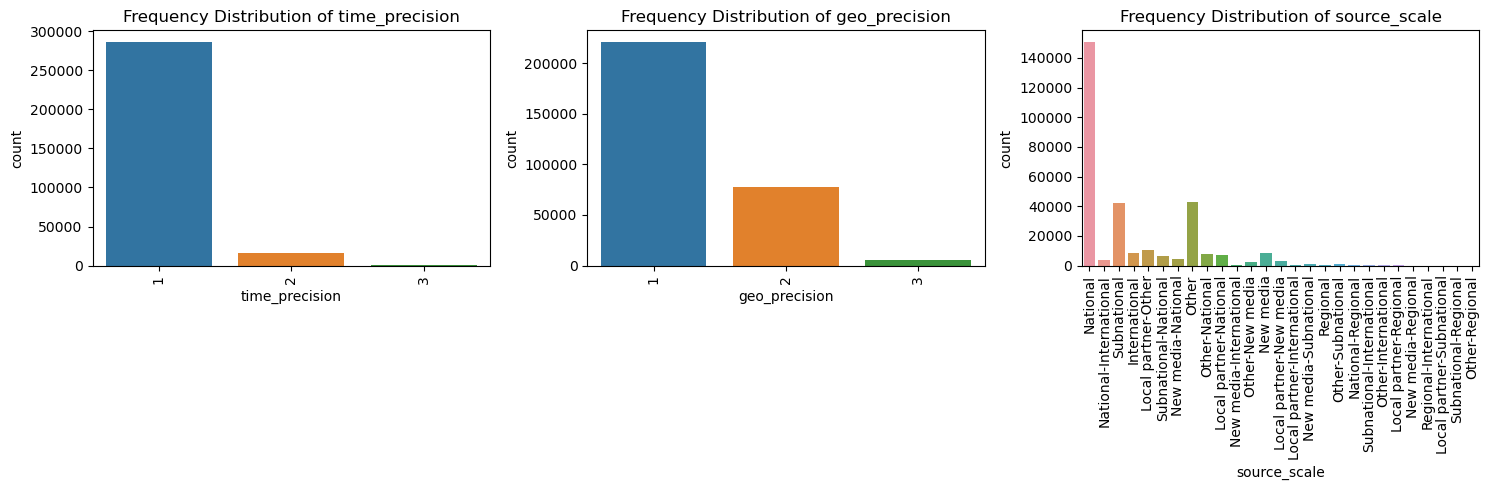

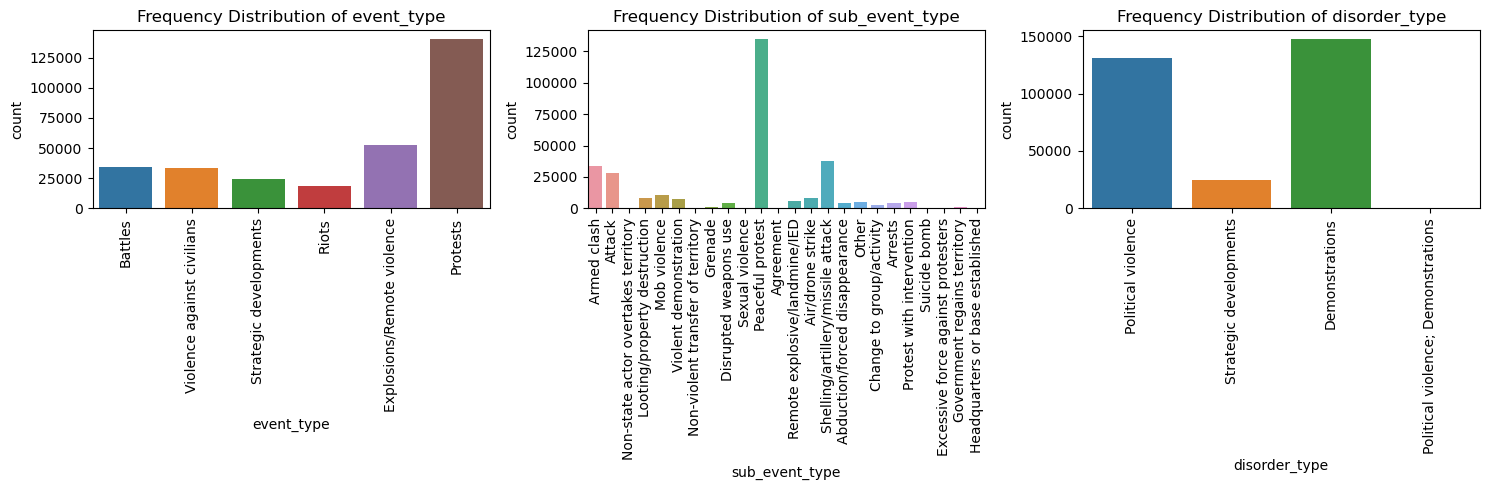

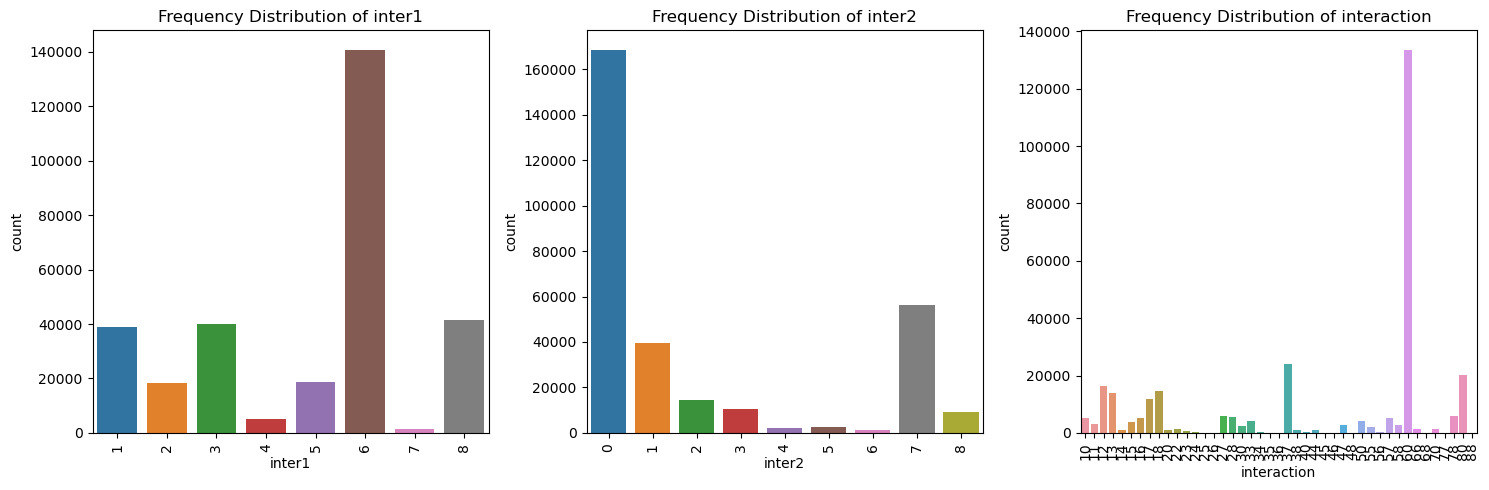

In [73]:
# Categorical data with few categories
fig, axs = plt.subplots(ncols=len(original_dataset[['time_precision', 'geo_precision', 'source_scale']].columns), figsize=(15, 5))

for i, column in enumerate(original_dataset[['time_precision', 'geo_precision', 'source_scale']].columns):
    if 1 < len(list(original_dataset[column].unique())) < 100:
        sns.countplot(x=column, data=original_dataset, ax=axs[i])
        axs[i].set_title('Frequency Distribution of {}'.format(column))
        axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(ncols=len(original_dataset[['event_type', 'sub_event_type', 'disorder_type']].columns), figsize=(15, 5))

for i, column in enumerate(original_dataset[['event_type', 'sub_event_type', 'disorder_type']].columns):
    if 1 < len(list(original_dataset[column].unique())) < 100:
        sns.countplot(x=column, data=original_dataset, ax=axs[i])
        axs[i].set_title('Frequency Distribution of {}'.format(column))
        axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(ncols=len(original_dataset[['inter1', 'inter2', 'interaction']].columns), figsize=(15, 5))

for i, column in enumerate(original_dataset[['inter1', 'inter2', 'interaction']].columns):
    if 1 < len(list(original_dataset[column].unique())) < 100:
        sns.countplot(x=column, data=original_dataset, ax=axs[i])
        axs[i].set_title('Frequency Distribution of {}'.format(column))
        axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

For categorical columns that have high cardinality, we look at the percentage distributions, below. 

* We see that actor1 an actor2 below both have a large amount of categories, and will probably need to be target/label encoded in order to capture their meaning. Also, contextually as this is 2022 data, the fact that Russia and Ukraine are the majority classes is also explainable and relevant.
* event_date is every single day of the year (366), with frequencies spread out. To make it less specific, we may want to only keep the months, which will be dealt with later.
* iso, country, admin1, admin2, admin3, and location (only a few of these are included below for brevity) are giving us very similar information, although each one is a subset of the other. It may be useful to only keep one or two of these, and we also have longitude and latitude in the numerical data, which may be more useful.
* tags is very spread out, but we will do more analysis on this later as we need it in order to create our target feature.

In [74]:
for i in original_dataset[['actor1', 'actor2', 'event_date', 'iso', 'country', 'admin1', 'tags']].columns:
    if 50000>len(list(original_dataset[i].unique()))>100:
        percentage = original_dataset[i].value_counts(normalize=True) * 100
        print("The percentages for {}".format(percentage))
        print("\n")

The percentages for actor1
Military Forces of Russia (2000-)                                        9.333027
Protesters (India)                                                       4.815478
Protesters (United States)                                               3.982788
Military Forces of Ukraine (2019-)                                       2.672492
Military Forces of Myanmar (2021-)                                       2.388030
                                                                           ...   
Pakam-Manuer-Agar Sub-Clan Militia (South Sudan)                         0.000328
Private Security Forces (Ghana)                                          0.000328
Police Forces of the United State (2021-) Central Intelligence Agency    0.000328
Saraya Ababil                                                            0.000328
Pim Pim Gang                                                             0.000328
Name: proportion, Length: 3873, dtype: float64


The percentages for ac

### Challenges in the data
* *Are there any challenges with the data? (missing values, outliers, imbalanced classes, biases, etc...) (5%)*

#### Missing Values
There are a large amount of missing values in assoc_actor_1, assoc_actor_2, actor2, civilian_targeting, admin1, admin2, admin3, and tags. These are mostly explained as there are not always second actors present at these events, and there are not always additional tags needed to be added. For assoc_actor_1/2, there may not always be specific groups, and civilian_targeting is left empty when civilians are not targeted. Many of these features will soon be discarded anyways as they are not relevant to the task at hand. For the ones that are, we will need to decide how to impute the missing values in the preprocessing steps.

In [9]:
missing_values = original_dataset.isnull().sum()
print(missing_values)

event_id_cnty              0
event_date                 0
year                       0
time_precision             0
disorder_type              0
event_type                 0
sub_event_type             0
actor1                     0
assoc_actor_1         175601
inter1                     0
actor2                168593
assoc_actor_2         264759
inter2                     0
interaction                0
civilian_targeting    260559
iso                        0
region                     0
country                    0
admin1                    97
admin2                  6502
admin3                148309
location                   0
latitude                   0
longitude                  0
geo_precision              0
source                     0
source_scale               0
notes                      0
fatalities                 0
tags                  142704
timestamp                  0
dtype: int64


#### Outliers

From the describe we did before (and replicated below) on the numerical data, we see that fatalities clearly has outliers, as its maximum, 500, is well above its 75% quartile, 1. This is because usually there are 0 fatalities, but occassionally there are a large amount. We will have to decide in the preprocessing whether the outliers are singificant to the model, or whether they will skew the model and therefore need to be removed.

In [10]:
original_dataset['fatalities'].describe()

count    304435.000000
mean          0.502794
std           4.107105
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         500.000000
Name: fatalities, dtype: float64

#### Imbalanced Dataset

We saw that tags is both missing many values, and also very imbalanced. Below is a quick analysis, although this will be shown more in depth later on once we have concretely created our target feature. Here, the classes are extremely imbalanced, but this does not take into account the other instances where women have been targeted (as it is not added to the notes and instead has to do with the associated actors, described in part 1 of this coursework). That should aid the imbalance a little, but this is a first sign into a challenge we will face throughout.

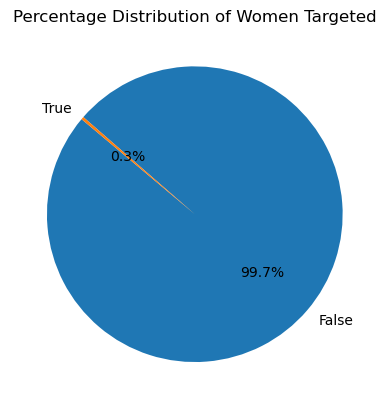

In [11]:
women_targeted = pd.DataFrame()
women_targeted['women_targeted'] = original_dataset['tags'].str.contains('women targeted', case=False, na=False)
women_targeted_counts = women_targeted['women_targeted'].value_counts()
women_targeted_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Women Targeted')
plt.ylabel('')
plt.show()

### Pre-processing

* *Does the data need any pre-processing to successfully apply standard machine learning models? If so, what kind? Please do the pre-processing that you consider necessary. (5%)*

To use and analyze this data, we will perform some initial preprocessing steps. These are outlined below:
* Remove unneeded columns based on domain knowledge
* Change the event_date column to event_month 
* Filter on the disorder_type that 'women targeted' information has been added to
* Define the target feature
* Remove columns which directly indicate target feature

In [12]:
raw_dataset = original_dataset

#### Remove columns
In order to properly be able to analyze this data, some columns which are clearly correlated, or not important to our task, will be dropped. The justification for these is below, and they are dropped in the code cell underneath:
* YEAR: As I am analyzing one year of data, this will always be the same (i.e. 2022 and a couple 2023's), and therefore it is being dropped.
* EVENT_ID_CNTY: This is essentially indexing as it is unique per event and so is not needed
* TIMESTAMP: This is the same throughout as the data was downloaded just once, and so will be dropped.
* ADMIN1, ADMIN2, ADMIN3, LOCATION: These all boil down to the same thing as longitude and latitude, which are already numerical representations and therefore the latter will be kept.
* COUNTRY: We already have ISO, which is a numeric code per country.
* INTER1, INTER2: The column INTERACTION is a combination of these, and therefore we will be keeping that instead.
* NOTES: This is a description of the event, and may provide too much insight into whether women specifically were targeted, so it will be removed.
* CIVILIAN_TARGETING: This is always true for our specific task, so it will be dropped.
* SOURCE, SOURCE_SCALE: These are giving us information that is about the time *after* the event has occurred, i.e. who is reporting it. Although this may be relevant as some news sources may not want to report information about women being the target of violence, if our task is to predict whether women *will* be the target, these do not add any information.
* GEO_PRECISION, TIME_PRECISION: This gives us information on how precise the location and times are, but this is dependent on the sources which we are removing and therefore these should be removed as well.

In [13]:
columns_to_drop = ['year', 'event_id_cnty', 'timestamp', 'admin1', 'admin2', 'admin3', 'location', 'country', 'inter1', 'inter2', 'notes', 'civilian_targeting', 'source', 'source_scale', 'geo_precision', 'time_precision']

raw_dataset = raw_dataset.drop(columns=columns_to_drop)

#### Change event_date column
For the event date column, we will only keep the month, as this could provide some information, but the day is too specific and the year, as said before, is always the same. This column will aslo be renamed to event_month.

In [14]:
raw_dataset['event_date'] = pd.to_datetime(raw_dataset['event_date'], format='%d %B %Y')
raw_dataset['event_month'] = raw_dataset['event_date'].dt.month
raw_dataset = raw_dataset.drop(columns = ['event_date'])

#### Filter on correct disorder_type
Before exploration, we need the correct data considering our task. As ACLED has only added the 'women targeted' tag to disorder types of 'Political Violence', we will remove any disorder type that do not include poltical violence, and then remove the disorder type column as it will be a constant throughout.

In [15]:
raw_dataset = raw_dataset[raw_dataset['disorder_type'].str.contains('Political Violence', case=False, na=False)]
raw_dataset = raw_dataset.drop(columns=['disorder_type'])
print('Our raw dataset now has {} columns, {} rows, and the columns names are: {}'.format(len(raw_dataset.columns), len(raw_dataset), list(raw_dataset.columns)))

Our raw dataset now has 14 columns, 131916 rows, and the columns names are: ['event_type', 'sub_event_type', 'actor1', 'assoc_actor_1', 'actor2', 'assoc_actor_2', 'interaction', 'iso', 'region', 'latitude', 'longitude', 'fatalities', 'tags', 'event_month']


#### Define target feature
We also need to clearly define the target feature. As mentioned before, when women are specifically targeted in PVTWIP, they add a tag called 'women targeted' in the 'tags' column. As this is the only tag we care about, we will be encoding it with 1 when it's included, and 0 when it isn't. Furthermore, if women are a targeted in PVTW, either of the assoc_actor_1/assoc_actor_2 will have 'Women' as part of it, and therefore we will be encoding 1 when either have 'Women', and 0 when neither do. These 1s and 0s will be included in a new column called 'women_targeted'.

In [16]:
raw_dataset['women_targeted'] = np.where(
    (raw_dataset['assoc_actor_1'].str.contains('Women ', case=False, na=False)) |
    (raw_dataset['assoc_actor_2'].str.contains('Women ', case=False, na=False)) |
    (raw_dataset['tags'].str.contains('women targeted', case=False, na=False)),
    1,
    0
)

#### Imbalanced class

As we discussed in the challenges, adding all the women targeted instead has increased the percentage distribution of the 'women_targeted=True' class, but this is still an extrmeely imbalanced problem. The count plot below reveals the imbalanced target class, which will be dealt with later on, in both preprocessing and in the model designing, with weighting and sampling.

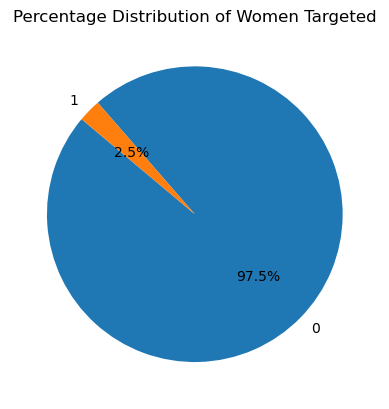

In [17]:
women_targeted_counts = raw_dataset['women_targeted'].value_counts()
women_targeted_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Women Targeted')
plt.ylabel('')
plt.show()

#### Avoid data leakage
And finally, in order to avoid leakage, as these three columns directly indicate the target, we will remove assoc_actor_1 and assoc_actor_2. The actor_1 and actor_2 column contain enough information to not need assoc_actor's. The tags column contains a couple other tags, including 'crowd size' and 'sexual violence', which could be useful for the task.

In [18]:
PVTWIP_indicator = [ 'women targeted: candidates for office', 
                     'women targeted: politicians',
                     'women targeted: political party supporters',
                     'women targeted: voters',
                     'women targeted: government officials',
                     'women targeted: activists/human rights defenders/social leaders',
                     'women targeted: protesters',
                     'women targeted: relatives of targeted groups or persons',
                     'women targeted: accused of witchcraft/sorcery',
                     'women targeted: girls' ]

for indicator in PVTWIP_indicator:
    raw_dataset['tags'] = raw_dataset['tags'].str.replace(indicator, '', case=False)

raw_dataset = raw_dataset.drop(columns=['assoc_actor_1', 'assoc_actor_2'])

#### Impute missing values

We will now impute missing values. As seen earlier, actor2 and tags both have missing values. For both of these, when values are missing, it implies that there are no additional actors or tags to be used, so a simple 'None' category will do for both of them. Earlier we decided to remove tags as we have extracted the useful information from it, so we will remove that feature and add 'None' to missing values for actor2.

In [19]:
raw_dataset = raw_dataset.drop(columns=['tags'])
raw_dataset['actor2'].fillna('None', inplace=True)

#### Categorical Encoding
The features which are categories (in a non-numerical state) are event_type, sub_event_type, actor1, actor2, region, and tags. These will all have to be dealt with in order to be able to train a model on this dataset.
* event_type, sub_event_type, region: these have low cardinality and therefore one hot encoding will be used.
* actor1, actor2: these are high cardinality features. They will be target encoded, but in order to avoid data leakage, the functions will be written below but used after we split the data into train test.

To avoid data leakage, we will be defining the transformers which perform the actions outlined above (including dropping the first dummy column from one hot encoding to avoid multi-collinearity), but will be used later on when we split our data to train and test. 

In [20]:
columns_to_encode = [cols for cols in categorical_columns if cols in raw_dataset.columns]
for column in columns_to_encode:
    print('{} has {} unique categories'.format(column, len(list(raw_dataset[column].unique()))))

iso has 167 unique categories
event_type has 5 unique categories
sub_event_type has 13 unique categories
actor1 has 3206 unique categories
actor2 has 2397 unique categories
region has 16 unique categories
interaction has 39 unique categories


In [21]:
from sklearn.preprocessing import OneHotEncoder, TargetEncoder

columns_to_one_hot = ['event_type', 'sub_event_type', 'region']
columns_to_target  = ['actor1', 'actor2', 'iso', 'interaction']

one_hot_encoder =  OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")
target_encoder  =  TargetEncoder(smooth=True).set_output(transform="pandas")


#### Dealing with outliers 
Although capturing information about fatalities is important, the outlier is pretty extreme and therefore we will adjust the dataset to not include any extreme values, through the IQR, or interquartile range method, which removes bottom and top 25% of values.

In [22]:
column_with_outliers = ['fatalities']

all_other_data = raw_dataset.drop(columns = column_with_outliers)

Q1=raw_dataset[column_with_outliers].quantile(0.25)
Q3=raw_dataset[column_with_outliers].quantile(0.75)

IQR=Q3-Q1

data_without_outlier = raw_dataset[column_with_outliers][~((raw_dataset[column_with_outliers]<(Q1-1.5*IQR)) | (raw_dataset[column_with_outliers]>(Q3+1.5*IQR)))]
raw_dataset = all_other_data.join(data_without_outlier.dropna(), how='right').reset_index()
raw_dataset = raw_dataset.drop(columns=['index'])

#### Deal with imbalanced class

The target class is very imbalanced, and how we deal with this will be discussed extensively later on. However, one of the main techniques to deal with imbalanced classes is resampling, which is essentially either adding to the minority class or removing from the majority class to balance out the classes more. The specific techniques I have chosen are listed below. RandomUnderSampler and RandomOverSampler are straightforward, but the interesting ones are SMOTE and SMOTEENN. Synthetic Minority Oversampling Technique Edited nearest Neighbors, or SMOTE-ENN, combines two techniques, oversampling and undersampling respectively. SMOTE adds synthetically interpolated data to the minority class, while ENN removes from the majority class when the label differs from the majority class label of the k-Nearest Neighbors, basically removing noisy instances. Together, they both add and remove samples, aiming to balance out the classes [8]. I chose this method specifically to get a combination of over and undersampling, to try best and deal with our data, but we will be experimenting with all the under, over, and combination samplings in our model. These will be used later in the training set to avoid data leakage.

In [23]:
#pip install imbalanced-learn

In [24]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

resampling_methods = {
    "SMOTE": SMOTE(random_state=42),
    "RandomUnderSampler": RandomUnderSampler(random_state=42),
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42)
}

#### Scaling 
Scaling is important as we will be using different machine learning models, and some of them are more sensitive to large and differing ranges of input data. The scaler used is the Standard Scaler, which is a simple scaler that is senstivie to outliers but can be used now that we have dealt with our outliers.

In [25]:
from sklearn.preprocessing import StandardScaler
adj_numerical_columns = [col for col in numerical_columns if col in raw_dataset.columns]
scaler = StandardScaler()

## Task and evaluation

### Task to solve

The task I am attempting to solve with this dataset, described briefly before, is identifying whether women will be the targets of certain events in the political violence sphere. This is an important task as it could help predict and therefore prevent, based on the type of event, where it is occurring, time of the year, and other features, whether women will be specific targets of it. Political violence is rampant around the world, and understanding how some groups become victims of it may shed light on the issue. The impact of gender-based violence, especially in the political sphere, means that women and girls could be less likely to voice their opinions, stand up for their own rights and the rights of others they care about, and even stand for election and be represented in their governments. Just this week, evidence of Iranian security forces using “rape and sexual violence to torture, punish and inflict lasting physical and psychological damage on protesters as young as 12 during the country’s nationwide protests last year”, was found by Amnesty International [9], showing just how relevant this problem is. Even though the task in this work may not solve gender-based violence in politics, it will at the very least analyze relationships in conflicts, and how they may come together to impact women and girls.

This will be a supervised learning binary classification problem, as we have the target feature, women_targeted, which we created previously, and this has two categories: 1 if women were specifically the target of this event, and 0 if they were not. Different binary classification models will be explored in the design section below.

### Propose and justify evaluation criteria

As mentioned before, the ‘women_targeted’ target class is extremely imbalanced, with the important category, women being targeted, being the minority class. This will be our ‘Positive’ class, and women not being targeted will be our ‘Negative’ class. As this is a binary classification problem, with an imbalanced class, we will be using precision, recall, F1 scores (all included in the classification report), as well as AUC-ROC and confusion matrix to evaluate the classes, as these are all useful in verifying how our model is doing. Precision is how many of the ‘Positive’ predictions are correct, recall is the number of ‘Positive’ predictions which are correct, over all the ‘Positive’ labels, and F1 score is a combination of the two, through the formula below [10]:

$$
\text{f1 score} = 2\times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

AUC-ROC, or area under the curve of the receiving operating characteristic, is the area under the True Positive Rate against the False Positive Rate, and essentially tells us how well our model distinguishes between classes. Confusion Matrix has these values in it intrinsically as well but is a more visual way of seeing True Positive and Negative, and False Positive and Negative [11]. The reason for using so many evaluation metrics is that with an imbalance class, some metrics can be higher but not show the true strength of the model, so seeing how models perform across several evaluation metrics will be useful.

We will additionally be experimenting with both class-weighted loss and resampling to see which approach works best for our dataset and model. Class-weighted losses take different weightings based on how imbalanced the classes are, whereas resampling could either mean undersampling, oversampling, or a combination of the two to mitigate the stark difference between the two classes. We will build a baseline model, and then a few other binary classification models, and experiment with the above to see how to best adapt a model for our task.

## Design and build an ML system

### Finish preprocessing steps

#### Train Test Split

In order to start designing and building my system and finish some of the preprocessing mentioned above, I will first split the data into train and test. We will be using the train_test_split function from sklearn, with 90% of data points towards the training and 10% towards the testing. We will also be using 'stratify=y' to ensure that the train and test sets have a similar percentage of each class in the target feature. This is important as we are dealing with an imbalanced target class.

In [26]:
from sklearn.model_selection import train_test_split
X = raw_dataset.drop(columns=['women_targeted']) 
y = raw_dataset['women_targeted']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

#### Encode the categorical data
We can finally use our OneHotEncoder and TargetEncoder that were previously designed. These will be fit on the training set, and then transformed on the test and train set separately.

In [27]:
one_hot_encoder.fit(X_train[columns_to_one_hot])
X_train[one_hot_encoder.get_feature_names_out()] = one_hot_encoder.transform(X_train[columns_to_one_hot])
X_train.drop(columns=columns_to_one_hot, inplace=True)
X_test[one_hot_encoder.get_feature_names_out()] = one_hot_encoder.transform(X_test[columns_to_one_hot])
X_test.drop(columns=columns_to_one_hot, inplace=True) 

X_train[columns_to_target] = target_encoder.fit_transform(X_train[columns_to_target], y_train)
X_test[columns_to_target] = target_encoder.transform(X_test[columns_to_target])

#### Scale the data
We will be scaling the numerical data so that the features can have similar ranges of data. As described before, we will be using the standard scaler, fit on the training set and transformed on the test and training set separately.

In [28]:
X_train[adj_numerical_columns] = scaler.fit_transform(X_train[adj_numerical_columns])
X_test[adj_numerical_columns] = scaler.transform(X_test[adj_numerical_columns])

### Define Evaluation Metrics

As described before, the evaluation metrics used are precision, recall, AUC-ROC, and most importantly, F1. The confusion matrix is also used for visualization. For ease, the function below defines all these and can be used in the experimental part of this paper to evaluate our different models.

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def evaluation_metrics(y_test, y_pred, y_pred_proba, name = '', model = {}):
    
    auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred) 
    f1 = f1_score(y_test, y_pred)

    model['precision_score'] = precision
    model['recall_score'] = recall
    model['f1_score'] = f1
    model['auc_roc_score'] = auc
    model['conf_matrix'] = conf_matrix

    if name and not model:
        print(f"Results for {name}")
        print(f"AUC-ROC: {auc}")
        print(f"precision: {precision}")
        print(f"recall: {recall}")
        print(f"f1: {f1}")

### Choosing and Designing the models

The models used in this paper will be widely available and use binary classification models (mostly) from the sklearn library. These are all explained below and will be implemented later.

**Logistic Regression**: This will be our baseline model. This is a statistical model that uses the sigmoid function, and outputs either a 1 or 0 based on a threshold. It is a non-computationally heavy model that works relatively well and will be used as our baseline [12].

**Decision Trees**:This is a supervised learning method that predicts the target class through basic decision rules reasoned from the features in our data [13]. These are useful in that they are relatively simple and the cost is logarithmic in the number of data points, but they can become overly complex and overfit to the data. The trees can also become biased if one class dominates, which is true in our case. I choose this as a middle ground between logistic regression and random forest classifiers, explained below.

**Random Forest**: This is a more complex model as it is an example of an ensemble model, which combines predictions from more than one base estimator. Each tree is created from certain samples of the features within the training set, and when each node is split, the best split comes from all of the input data [14]. The aim is to try and decrease the variance. Random forest usually works quite well and is used for classification problems often, so I have chosen it as a slightly more complex model that could improve on the baseline.

**Gaussian Naive Bayes**: Naive Bayes methods are based on Bayes’ theorem with the rather naive assumption of “conditional independence between every pair of features given the value of the class variable” [15]. They work well on small sets of training data and can be extremely quick, but they can be bad estimators. This model was chosen to have an example of a non-decision tree and to see how it performs on imbalanced data.

**XGB Boost**: XGB Boost, or Extreme Gradient Boosting is a model that provides parallel tree boosting, through gradient boosting decision trees, which are also ensemble algorithms. It is quick and usually has very high model performance [16]. It is more complex than all the above but can be class-weighted to account for imbalance classes. It was chosen for its complexity, to see if it will be an improvement on all the previous models.


In [30]:
#!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#### Baseline Models

The baseline version of the models explained above are now defined in a dictionary below. These are all the simplest versions of themselves, without any parameter tuning except for increasing the number of iterations for logistic regression to allow it to run to its full capacity.

In [31]:
models = dict()

models['Logistic Regression'] = {'model': LogisticRegression(random_state=42, max_iter=1000)}

models['Decision Tree Classifier'] = {'model': DecisionTreeClassifier(random_state=42)}

models['Random Forest Classifier'] = {'model': RandomForestClassifier(random_state=42)}

models['Gaussian Naive Bayes'] = {'model': GaussianNB()}

models['XGBoost Classifier'] = {'model': XGBClassifier(random_state=42)}

#### Balanced Models

Now we create slightly more specific models, which take into account the class imbalance by (mostly) using weighted loss function. The majority of the models have a ‘class_weight’ parameter, which when set to ‘balanced’, takes the values from the target class to adjust the weights, inversely proportional, to the class frequencies in the input features. For XGBoost, we use ‘scale_pos_weight’ parameter, which is set to the ratio of negative samples to positive ones. Finally, for GaussianNB we set the priors to 50% for each class, to try and make the minority class have more importance. These are all chosen to try and mitigate the effects of the extremely imbalanced target class in our dataset.

In [32]:
balanced_models = dict()

balanced_models['Logistic Regression Balanced'] = {'model': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')}

balanced_models['Decision Trees Balanced'] = {'model': DecisionTreeClassifier(random_state=42, class_weight='balanced')}

balanced_models['Random Forest Balanced'] = {'model': RandomForestClassifier(random_state=42, class_weight='balanced')}

balanced_models['Gaussian Naive Bayes Balanced'] = {'model': GaussianNB(priors=[0.5, 0.5])}

balanced_models['XGBoost Balanced'] = {'model': XGBClassifier(random_state=42, scale_pos_weight=float(y_train.value_counts()[0]) / y_train.value_counts()[1])}

#### Resampled Models

Finally, we will also be resampling the data. Again, this will be explained in more detail below, but the sampling methods we defined above (RandomOverSampler, RandomUnderSampler, SMOTE, SMOTE-ENN) will be used on each of the 'baseline' models above, to see if this also has a positive effect on the performance of the models considering the imbalance. The experimentation section of this paper will compare the two and make conclusions as to which works better on our dataset, and why.

In [33]:
resampling_models = {m + ' ' + k: {'model': models[m]['model'], 'method': k} for m in models for k in resampling_methods.keys()}

In [34]:
resampled_sets = {}
for name, method in resampling_methods.items():
    X_resampled, y_resampled = method.fit_resample(X_train, y_train)
    resampled_sets[name] = (X_resampled, y_resampled)


## Experimental analysis (performance & scalability)

### Testing the models

Below we will test each of the groups of models we have defined. First the baseline models, which are not in any way scaled to take into account imbalance. Secondly, the balanced models, which use the parameters given in the models themselves to try and balance the class weights with either weighted loss functions or priors. Finally, we will test a range of resampling methods, both over, under, and a combination of the two, to see whether resampling will have more of an effect on the models performance.

#### Baseline model testing

The following tests the baseline models. We will look in particular at Logistic Regression, which is our true baseline, and Random Forest, which is hypothesized to perform the best.

In [35]:
for name, model in models.items():
    m = model['model']
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    y_pred_proba = m.predict_proba(X_test)[:, 1]
    evaluation_metrics(y_test, y_pred, y_pred_proba, name, model)

#### Balanced models testing

The balanced models are tested below. These will be compared to all the baseline models tested previously.

In [36]:
for name, model in balanced_models.items():
    m = model['model']
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    y_pred_proba = m.predict_proba(X_test)[:, 1]
    evaluation_metrics(y_test, y_pred, y_pred_proba, name, model)

#### Resampling models testing

Each baseline model now is tested with each of the resampling methods. This again will be compared to both the baseline models and the balanced models above.

In [37]:
for name, model in resampling_models.items():
    m = model['model']

    X_resampled, y_resampled = resampled_sets[model['method']]

    m.fit(X_resampled, y_resampled)

    y_pred = m.predict(X_test)
    y_pred_proba = m.predict_proba(X_test)[:, 1]

    evaluation_metrics(y_test, y_pred, y_pred_proba, name, model)


### Performance of the models

#### Baseline models

The baseline models performed quite badly overall. Logistic regression had a very high precision (just under XGBoost), but the lowest recall, meaning it made much fewer errors in predicting the 0 label, but the most when it came to predicting label 1. Random Forest had the highest F1 Score, which means it had the best balance of the two, but it too was not very good at predicting label 1, which is the important one. Gaussian NB was the only model which exhibited the opposite behavior - it predicted label 1 almost perfectly, but label 0 was predicted terribly. The confusion matrices of Logistic Regression, Random Forest, and Gaussian are reproduced below. The goal now is to improve on all of these models, as clearly they are not performing well when predicting whether women were the targets of political events.

In [38]:
df = pd.DataFrame(index=models.keys())
df['F1 Score'] = [model['f1_score'] for model in models.values()]
df['Precision'] = [model['precision_score'] for model in models.values()]
df['Recall'] = [model['recall_score'] for model in models.values()]
df['AUC-ROC'] = [model['auc_roc_score'] for model in models.values()]

df.style.highlight_max(color='red')

,F1 Score,Precision,Recall,AUC-ROC
Logistic Regression,0.274933,0.894737,0.162420,0.906754
Decision Tree Classifier,0.247734,0.235632,0.261146,0.619938
Random Forest Classifier,0.296104,0.802817,0.181529,0.888569
Gaussian Naive Bayes,0.137070,0.073595,0.996815,0.871000
XGBoost Classifier,0.294118,0.916667,0.175159,0.914684


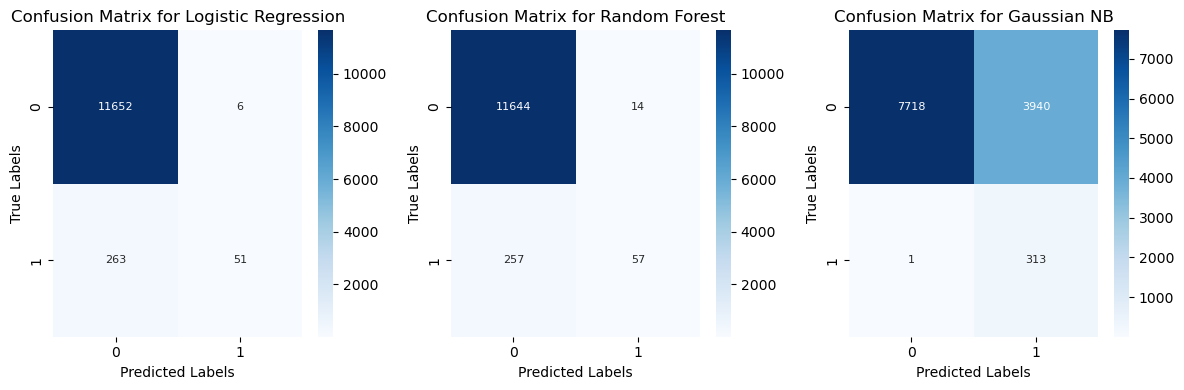

In [43]:
conf_matrix_log_reg = models['Logistic Regression']['conf_matrix']
conf_matrix_random_for = models['Random Forest Classifier']['conf_matrix']
conf_matrix_gauss_nb = models['Gaussian Naive Bayes']['conf_matrix']

fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8}, ax=axs[0])
axs[0].set_title('Confusion Matrix for Logistic Regression')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_random_for, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8}, ax=axs[1])
axs[1].set_title('Confusion Matrix for Random Forest')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

sns.heatmap(conf_matrix_gauss_nb, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8}, ax=axs[2])
axs[2].set_title('Confusion Matrix for Gaussian NB')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

#### Balanced Models

The balanced models had surprising performances. Random Forest performed slightly better in the F1 score, so slightly better overall, mostly due to the recall, i.e. the prediction of label 1, improving slightly. Gaussian NB and Decision Tree had either no or very little change in their performance, and XGB Boost and Logistic Regression both got significantly worse. Logistic regression essentially swapped, and began predicting label 1 very accurately and label 0 completely inaccurately. Random Forest did not improve as much as expected, indicating that perhaps the weighted loss function cannot capture the imbalanced class very well. The confusion matrices for Logistic regression and random forest are shown below.

In [40]:
balanced_df = pd.DataFrame(index=balanced_models.keys())
balanced_df['F1 Score']  = [model['f1_score'] for model in balanced_models.values()]
balanced_df['Precision'] = [model['precision_score'] for model in balanced_models.values()]
balanced_df['Recall']    = [model['recall_score'] for model in balanced_models.values()]
balanced_df['AUC-ROC']   = [model['auc_roc_score'] for model in balanced_models.values()]

balanced_df.style.highlight_max(color='red')

,F1 Score,Precision,Recall,AUC-ROC
Logistic Regression Balanced,0.161711,0.088068,0.987261,0.906581
Decision Trees Balanced,0.247678,0.240964,0.254777,0.616697
Random Forest Balanced,0.308483,0.800000,0.191083,0.894128
Gaussian Naive Bayes Balanced,0.137070,0.073595,0.996815,0.866940
XGBoost Balanced,0.203526,0.116407,0.808917,0.911229


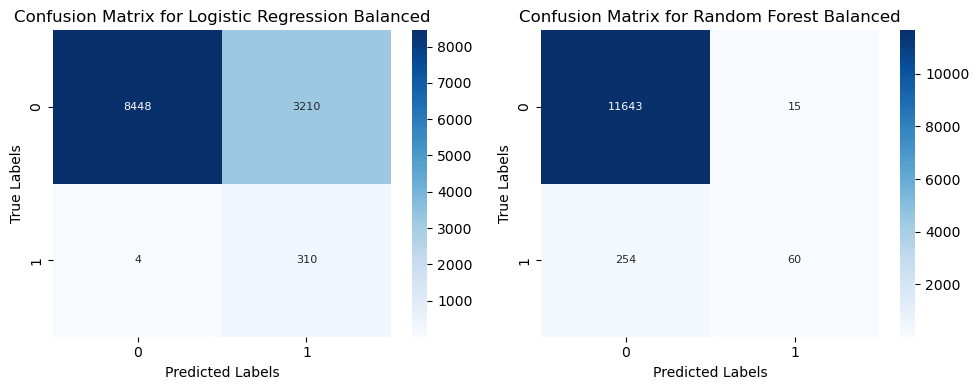

In [49]:
conf_matrix_log_reg = balanced_models['Logistic Regression Balanced']['conf_matrix']
conf_matrix_random_for = balanced_models['Random Forest Balanced']['conf_matrix']

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8}, ax=axs[0])
axs[0].set_title('Confusion Matrix for Logistic Regression Balanced')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_random_for, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8}, ax=axs[1])
axs[1].set_title('Confusion Matrix for Random Forest Balanced')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

#### Resampled Models

The resampled models performed worse overall. Random Forest Classifier using Random Over Sampling came out on top with its F1 score, but worse than the balanced and baseline Random Forest. The recalls were a lot higher accross the board, but this came with precision falling extremely low in most cases. A notable conclusion is that Random Oversampling performed best for all the models, showing its high efficiency, at least compared to the other resampling techniques.

In [41]:
resampling_df = pd.DataFrame(index=resampling_models.keys())
resampling_df['F1 Score'] = [model['f1_score'] for model in resampling_models.values()]
resampling_df['Precision'] = [model['precision_score'] for model in resampling_models.values()]
resampling_df['Recall'] = [model['recall_score'] for model in resampling_models.values()]
resampling_df['AUC-ROC'] = [model['auc_roc_score'] for model in resampling_models.values()]

resampling_df.style.highlight_max(color='red')

,F1 Score,Precision,Recall,AUC-ROC
Logistic Regression SMOTE,0.162679,0.088747,0.974522,0.905485
Logistic Regression RandomUnderSampler,0.162005,0.088320,0.977707,0.905632
Logistic Regression RandomOverSampler,0.161669,0.088043,0.987261,0.905790
Logistic Regression SMOTEENN,0.163179,0.088992,0.980892,0.906036
Decision Tree Classifier SMOTE,0.172649,0.095191,0.926752,0.844745
Decision Tree Classifier RandomUnderSampler,0.169935,0.095256,0.786624,0.797672
Decision Tree Classifier RandomOverSampler,0.240000,0.251748,0.229299,0.605681
Decision Tree Classifier SMOTEENN,0.171429,0.095569,0.831210,0.809669
Random Forest Classifier SMOTE,0.191988,0.108919,0.808917,0.893525
Random Forest Classifier RandomUnderSampler,0.171644,0.094418,0.942675,0.905086


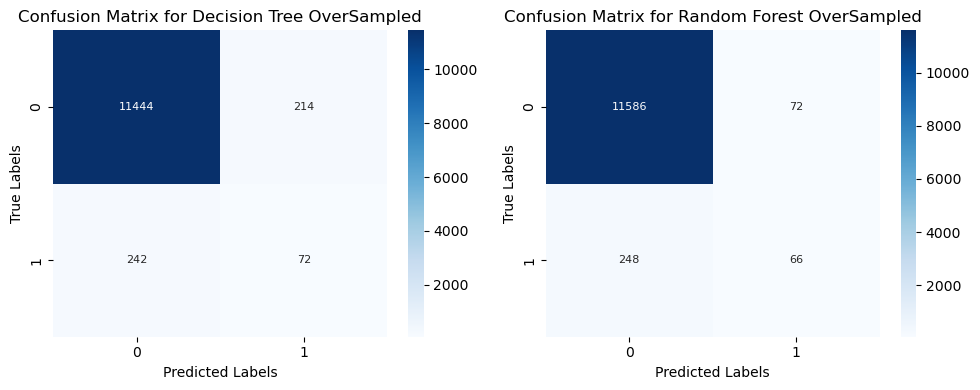

In [52]:
conf_matrix_decision_tree = resampling_models['Decision Tree Classifier RandomOverSampler']['conf_matrix']
conf_matrix_random_for = resampling_models['Random Forest Classifier RandomOverSampler']['conf_matrix']

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8}, ax=axs[0])
axs[0].set_title('Confusion Matrix for Decision Tree OverSampled')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_random_for, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8}, ax=axs[1])
axs[1].set_title('Confusion Matrix for Random Forest OverSampled')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

#### Overall Performance

Overall, the models did not vary as much as expected, even with two different methods used to take into account the imbalance. The balanced Random Forest Classifier performed best, but only slightly better than the pure baseline model, logistic regression. It was able to predict 1s a bit better, which is important, but none of the methods or models allowed us to achieve a healthy balance between the precision and recall. This points towards issues with the dataset, as enough experimentation has been done to show that there is not enough improvement in the models to imply that any more tweaking will help significantly. The computationally heavier model, XGB Boost, never performed better than the others, and from the very first tests, Gaussian NB was able to predict 1s with the most accuracy, but 0s with terrible accuracy.

In [42]:
combined_df_2 = pd.concat([df, balanced_df, resampling_df])
combined_df_2.style.highlight_max(color='red')

,F1 Score,Precision,Recall,AUC-ROC
Logistic Regression,0.274933,0.894737,0.162420,0.906754
Decision Tree Classifier,0.247734,0.235632,0.261146,0.619938
Random Forest Classifier,0.296104,0.802817,0.181529,0.888569
Gaussian Naive Bayes,0.137070,0.073595,0.996815,0.871000
XGBoost Classifier,0.294118,0.916667,0.175159,0.914684
Logistic Regression Balanced,0.161711,0.088068,0.987261,0.906581
Decision Trees Balanced,0.247678,0.240964,0.254777,0.616697
Random Forest Balanced,0.308483,0.800000,0.191083,0.894128
Gaussian Naive Bayes Balanced,0.137070,0.073595,0.996815,0.866940
XGBoost Balanced,0.203526,0.116407,0.808917,0.911229


#### Room for Improvement

Clearly there is a lot of room for improvement, but this probably has to do with going back to the dataset and deciding whether it is concrete enough to actually perform this prediction on it. The results indicate that trying to improve the imbalance any further and try to use the Random Forest Classifier will only yield slightly better results, and therefore this should not be the focus in further exploration. More detail about this will come later. Additionally, no deep learning or neural network models were used, which could be another addition to this experiment.

### Scalibility of the models

#### Real world application

This model, as it currently exists, should not be deployed for real world application. It has a very low F1 score, indicating it is not good at predicting between whether women were the targets of certain events or not. As the subject of this task is so important, an extremely unusable model like this one would just cause confusion and not aid the cause of bringing about gender inequality and peace, as outlined before. 

## Ethical considerations


### Biases in dataset collection

The dataset itself could be biased. As the dataset is manually curated by experts to include and classify each event, and each event itself comes from sources (international, national, local). Both of these can lead to biases as certain countries/regions may bury certain events more, and the experts that curate the ACLED database may have biases as well. At an even higher level, the nature of these events is tense and therefore any retelling/recounting of it may be biased in itself. Especially important for our task is when they add the tag 'women targeted' tag. This is also manually done, and although this could avoid biases in models deciding whether events targeted women specifically (for example our model above), human biases need to be taken into account as well. All of this may have lead to potential noise in the dataset as well, as with highly tense events, potentially biased collection, and potentially biased sources, a model may not be able to dig through all this and come out with anything meaningful.

### Impact in real world use

The imbalanced classes introduces ethical concerns as well. Although we took this into account to avoid biases in evaluation metrics, i.e. by not using accuracy, it raises other dilemmas. Clearly we saw during the testing that the models were never fair across classes. They were only able to classify one class correctly at a time, based on whether resampling or balanced had been used. This shows that our dataset and model were not precise enough to be able to correctly make classifications. Additionally, because the size of the 'women targeted' class is so much smaller in the dataset, nuance and patterns that could lead to better prediction might be lost. This all comes together to prove that this model and this dataset, as they currently stand, could have sever implications if used in the real world. If the model were to either over-predict violence against women, or under-predict, this could actually perpetuate gender inequality and conflict around the world. Incidents where women need special attention might go unnoticed and could also cause a feedback loop of more violence. If instead the model overpredicted violence against women, this could cause resentment and for the issue to be taken less seriously. 

### Sensitivity/Interpretability Analysis

In order to assess the sensitivity/interpratibility of the model, feature importance for both the regular Random Forest Classifier and the balanced random forest classifier are shown below. Although relatively similar, interestingly they have a few differences in their top five most important features. Interaction, actor2, and the event type 'Violence Against Civilians' were the most important features for both models.  This is understandable as interaction and actor 2 are interlinked, where both give information on who the actors at play were in the event, and certain actors, such as certain police forces, may be more prone to violence against women. Also, interactions where one of the parties is civilians or protestors, rather than two military forces against each other, might point towards potential power imbalances and therefore violence against women. The event type 'Violence Against Civilians' also suggests this. What is intersting is that although actor1 is important in the classic Random Forest model, along with ISO (which is country code), longitude and latitude take those places in the balanced model. This implies that the location of the event has more significance in predicting 'women targeted' in the slightly better model. This may bring up the point of whether the model could perform better at a local rather than global level, and this would be interesting to explore.

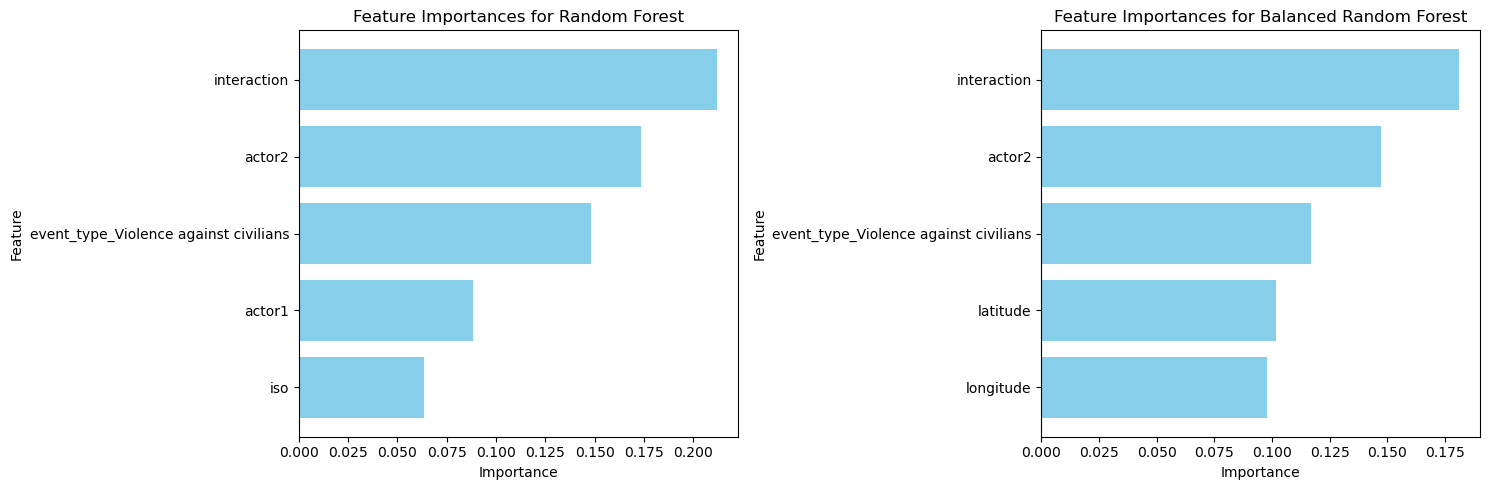

In [67]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

importances = models['Random Forest Classifier']['model'].feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
top_features = feature_importances[:5]

top_features_rf = feature_importances[:5]
axs[0].barh(top_features_rf['feature'], top_features_rf['importance'], color='skyblue')
axs[0].set_xlabel('Importance')
axs[0].set_ylabel('Feature')
axs[0].set_title('Feature Importances for Random Forest')
axs[0].invert_yaxis()

importances = balanced_models['Random Forest Balanced']['model'].feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
top_features = feature_importances[:5]

top_features_brf = feature_importances[:5]
axs[1].barh(top_features_brf['feature'], top_features_brf['importance'], color='skyblue')
axs[1].set_xlabel('Importance')
axs[1].set_ylabel('Feature')
axs[1].set_title('Feature Importances for Balanced Random Forest')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()

## Sustainable development relevance & impact

### SDGs the dataset & model can promote
This was covered briefly at the start of the paper and is explored in detail in this section. The paper “Sustainable Development Goals and Violence Against Women and Girls” by the Equality Institute in 2021 implies that without ending gender-based violence, 14 of the 17 UN SDGs will not be achieved [17]. The only ones this paper implies ending gender-based violence does not affect are 12: Responsible Consumption and Production, 14: Life Below Water, and 15: Life on Land. Although all 14 are important, the below five are the most connected to our model and dataset specifically. 
#### Target 5: Achieve gender equality and empower all women and girls
The clearest goal that a dataset outlining events that target women could help achieve is Gender Equality, as without ending violence against women, Gender Equality can never be achieved, and vice versa. Although usually this is spoken about when referring to domestic violence, predicting public violence and specifically political violence against women, could make that same violence preventable in the future.
#### Target 16: Promote peaceful and inclusive societies for sustainable development, provide access to justice for all and build effective, accountable and inclusive institutions at all levels
The ACLED dataset, which collects data on all conflicts around the world, is a promoter of Target 16 for Peace. To be able to achieve peace, these conflicts need to be understood, analyzed, and perhaps predicted to enable prevention. Specifically ending the targeting of women and girls, considering the dataset focuses on political violence, would certainly help bring about peace by allowing for more democratic societies, with political actors and families of political actors feeling safe.
#### Target 3: Ensure healthy lives and promote well-being for all at all ages
Targeted violence against women can come in many forms, and unfortunately includes sexual violence. Preventing such violence from happening would lower the risk of unwanted pregnancies, and therefore death during pregnancy and childbirth. Mental health, where conflicts that target women could cause high stress and post-traumatic stress disorder, also needs to be taken into account [17].
#### Target 4: Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all
If women feel unsafe in their countries because political violence is specifically targeting them, they will also feel unsafe in going and staying at school. Also, fewer women in politics due to PVTWIP could lead to an underrepresentation of their interests in policy in their communities, and therefore lead to potentially fewer encouragements for young girls and women to attend schools.
#### Target 8: Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all
Women being discouraged from participating in politics hinders progress towards inclusive and decent work for all. According to this paper, “even women who have decent work are still likely to face unresolved sexual harassment and exploitation and continue to feel unsafe” [17], and this could certainly be true in the political sphere. Predicting and preventing these events from happening would encourage women to enter politics, as well as other work, as they will be better represented in their government.


### SDGs the dataset & model could hinder
#### Target 5: Achieve gender equality and empower all women and girls
Unfortunately, because of the biases and ethical considerations surrounding the noise in the dataset and the model's poor predictions, actually using the model to try and eliminate gender inequality might create the feedback loop discussed earlier. This could happen through resentment due to over-predicting women as targets, or lack of resources and aid when women actually are the targets of events but not identified as such by the model. This could have a snowball effect as gender equality is “central to development, environmental sustainability and the achievement of the SDGs” [18], and therefore not achieving Target 5 could hinder a wide breadth of other SDGs.
#### Target 16: Promote peaceful and inclusive societies for sustainable development, provide access to justice for all and build effective, accountable and inclusive institutions at all levels
In the same vain, a dataset with potential biases and a model that cannot predict well would not do well to promote peace (if used in their current states). Events could be mispredicted, leading to more harm than peace, similar to the above. Specifically, an event that is predicted as general violence which is specifically violence against women could prevent bespoke justice and aid for victims of it, as well as diminish understanding of when and why it is happening.


### Overall summary from experiments & connections to SDGs

The goal of the experiments done and the final model used was to try and create a predictor of whether women would be targets of political violence (through a range of sub-events). The results of the experiments and the dive into ethical dilemmas have revealed several points to consider. Firstly, improving the model's performance and the dataset's bias could lead to progress towards achieving certain (even a majority) of the SDGs. More investigation needs to be done into the dataset's noise and overall features to try and improve this, and therefore lead to more informed decision-making through the model and consequently better results towards the SDGs. Secondly, understanding which features are more impactful in our model allows for transparency, and if the model and dataset were to be improved upon, this feature importance analysis should continue. Finally, to achieve sustainable development in general, understanding human biases in datasets and model biases in machine learning need to be an essential part of creating a machine learning pipeline.


## References

[1] Raleigh, C., Linke, A., Hegre, H. and Karlsen, J. (2010). Introducing ACLED: An Armed Conflict Location and Event Dataset. Journal of Peace Research, 47(5), pp.651–660. doi:https://doi.org/10.1177/0022343310378914.

[2] ACLED (2023). Gendered Actors: uses and limitations of ACLED data. Armed Conflict Location & Event Data Project (ACLED). Available at: https://acleddata.com/knowledge-base/gendered-actors/

[3] Trivedi A, Keator K, Verma A, Dodhia R, Ferres JL. (2020) “ECO: Using AI for Everyday Armed Conflict Analysis”. Center for Research and Computation Society. Available at: https://crcs.seas.harvard.edu/publications/eco-using-ai-everyday-armed-conflict-analysis

[4] Olaide, Olabanji & Ojo, Adebola. (2021). “A Model for Conflicts' Prediction using Deep Neural Network. International Journal of Computer Applications”. 183. 10.5120/ijca2021921667. 
[5] United Nations (2023). Goal 5 | Department of Economic and Social Affairs. [online] sdgs.un.org. Available at: https://sdgs.un.org/goals/goal5#targets_and_indicators.


[6] United Nations (2023). Goal 16 | Department of Economic and Social Affairs. [online] sdgs.un.org. Available at: https://sdgs.un.org/goals/goal16#targets_and_indicators.

[7] ACLED, (2019). Armed Conflict Location & Event Data	Project	(ACLED) Codebook.

[8] Viadinugroho, R.A.A. (2021). Imbalanced Classification in Python: SMOTE-ENN Method. [online] Medium. Available at: https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50 [Acessed 5 Dec. 2023]

[9] Parent, D. (2023). Iranian regime accused of raping and violating protesters as young as 12. The Guardian. [online] 6 Dec. Available at: https://www.theguardian.com/global-development/2023/dec/06/iranian-regime-accused-of-raping-and-violating-protesters-as-young-as-12 [Accessed 6 Dec. 2023].

[10] Kanstrén, T. (2020). A Look at Precision, Recall, and F1-Score. [online] Medium. Available at: https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec [Accessed 9 Dec. 2023].

[11] Bhandari, A. (2020). Guide to AUC ROC Curve in Machine Learning : What Is Specificity? [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#What_is_the_AUC-ROC_Curve? [Accessed 8 Dec. 2023].

[12] Banoula, M. (2023). An Introduction to Logistic Regression in Python. [online] Simplilearn.com. Available at: https://www.simplilearn.com/tutorials/machine-learning-tutorial/logistic-regression-in-python#what_is_logistic_regression [Accessed 9 Dec. 2023].

[13] scikit-learn (2009). 1.10. Decision Trees — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/tree.html [Accessed 8 Dec. 2023].

[14] scikit-learn (n.d.). 1.11. Ensemble methods. [online] scikit-learn. Available at: https://scikit-learn.org/stable/modules/ensemble.html#random-forests [Accessed 8 Dec. 2023].

[15] sk-learn (n.d.). 1.9. Naive Bayes — scikit-learn 0.23.2 documentation. [online] scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes.

[16] Brownlee, J. (2016). A Gentle Introduction to XGBoost for Applied Machine Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/ [Accessed 8 Dec. 2023].

[17] Dr. Homan, S. and Dr. Fulu, E. (2021). Sustainable Development Goals and Violence Towards Women and Girls. [online] The Equality Institute. Available at: https://equalityinstitute.org/projects/sustainable-development-goals-and-violence-against-women-and-girls [Accessed 10 Dec. 2023].

[18] OECD (2021), Gender and the Environment: Building Evidence and Policies to Achieve the SDGs, OECD Publishing, Paris, https://doi.org/10.1787/3d32ca39-en.
